In [14]:
import sympy as sym
from IPython.display import display
from IPython.core.display import Math
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
from matplotlib.patches import Polygon
import sympy.plotting.plot as symplot 
import scipy as sp
from scipy.signal import find_peaks

sym.init_printing()


In [15]:
a = np.arange(1, 6)
expr1 = np.sum(a)/np.sum(a**2) - 1/np.sum(a)
expr2 = np.prod(a)/np.prod(a**2) - 1/np.prod(a)

display(Math(sym.latex(expr1)))
display(Math(sym.latex(expr2)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

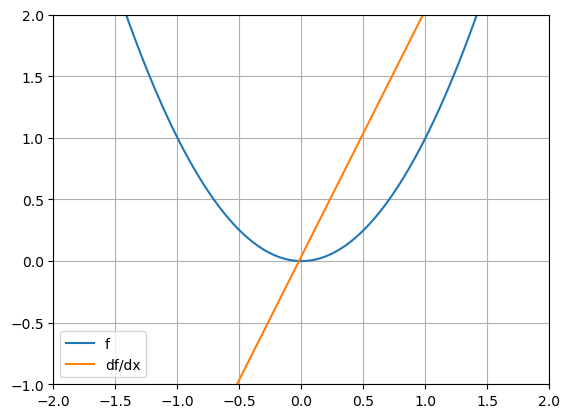

In [16]:
x = np.linspace(-2, 2, 100)

y = x**2
y1 = np.diff(y)/np.diff(x)


axis = plt.gca()
axis.set_xlim([-2, 2])
axis.set_ylim([-1, 2])
plt.plot(x, y, label='f')
plt.plot(x[:-1], y1,label = 'df/dx')
plt.legend()
plt.grid()
plt.show()


In [17]:
x = sym.symbols('x')

for i in range(1, 10):
    coeffs = np.arange(1, i+1)
    print(f'A degree {len(coeffs)} polynomial has {len(np.roots(coeffs))+1} roots')



A degree 1 polynomial has 1 roots
A degree 2 polynomial has 2 roots
A degree 3 polynomial has 3 roots
A degree 4 polynomial has 4 roots
A degree 5 polynomial has 5 roots
A degree 6 polynomial has 6 roots
A degree 7 polynomial has 7 roots
A degree 8 polynomial has 8 roots
A degree 9 polynomial has 9 roots


C:\Users\kantulaev\AppData\Local\Temp\ipykernel_10732\648217447.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  out[0] = (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
C:\Users\kantulaev\AppData\Local\Temp\ipykernel_10732\648217447.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  out[1] = (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)


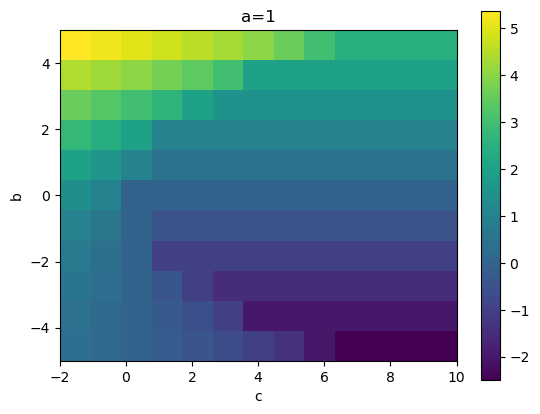

In [18]:
def quadeq(a, b, c):
    out = np.zeros(2)

    out[0] = (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
    out[1] = (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)

    return out


a = 1
b = np.arange(-5, 6)
c = np.arange(-2, 11)

matr = np.zeros((len(b), len(c)))

for bi in range(0, len(b)):
    for ci in range(0, len(c)):
        matr[bi, ci] = quadeq(a, b[bi], c[ci])[0]


plt.imshow(matr, extent=[c[0], c[-1], b[0], b[-1]])
plt.xlabel('c')
plt.ylabel('b')
plt.colorbar()
plt.title('a='+str(a))
plt.show()


In [19]:
from numpy import imag, real


w = complex(2, 4)
z = complex(5, 6)
real(w)

print(complex(real(z), imag(z)) + complex(real(w), imag(w)))
print(w + z)


(7+10j)
(7+10j)


In [20]:
from numpy import conj
a, b = sym.symbols("a,b", real=True)

z = a + b*sym.I

display(Math(
    f' z \\times z^* = {sym.latex(sym.expand(z * conj(z)))}'))


<IPython.core.display.Math object>

In [21]:
z = complex(4, 2)
w = complex(3, 5)

expr = (((z-1) * z*w+w)/(w*z-w)) * (((w-1)*(1-w))/(-z*w**2-w**2+2*w*z+2*w-z-1))

display(Math(sym.latex(sym.sympify(expr))))


<IPython.core.display.Math object>

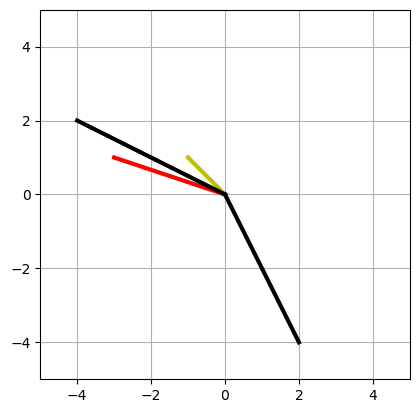

In [22]:
z1 = complex(-3,1)
z2 = complex(-1,1)

plt.plot([0,np.real(z1)],[0,np.imag(z1)],'r',linewidth=3)
plt.plot([0,np.real(z2)],[0,np.imag(z2)],'y',linewidth=3)
plt.plot([0,np.real(z1+z2)],[0,np.imag(z1+z2)],'k',linewidth=3)
plt.plot([0,np.real(z1*z2)],[0,np.imag(z1*z2)],'k',linewidth=3)
plt.axis('square')
plt.axis([-5,5,-5,5])
plt.grid()

plt.show()

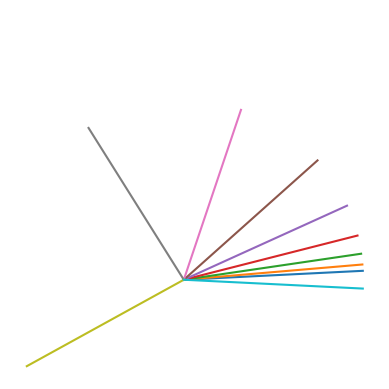

In [23]:
x = np.linspace(-3, 1.83, 10)

k = np.exp(x)
for i in range(0, len(x)):
    plt.plot([0, np.cos(k[i])], [0, np.sin(k[i])])
plt.axis('square')
plt.axis('off')
plt.show()


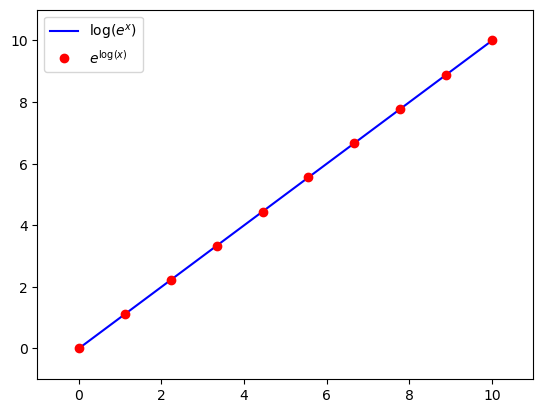

In [24]:
x = np.linspace(0.0001, 10, 10)
y1 = np.log(np.exp(x))
y2 = np.exp(np.log(x))

plt.plot(x, y2, 'b')
plt.plot(x, y1, 'ro')
plt.axis([-1, 11, -1, 11])
plt.legend(['$\\log(e^x)$', '$e^{\\log(x)}$'])

plt.show()


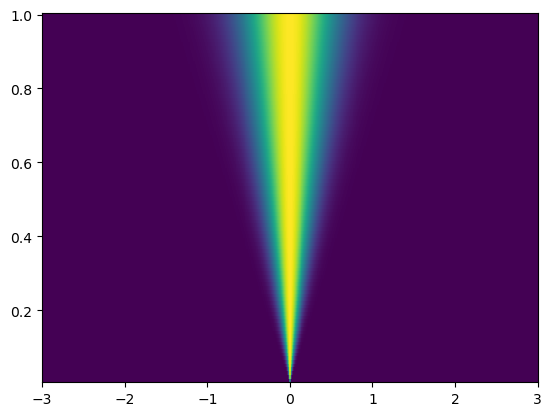

In [25]:
from sympy import plot


t = np.linspace(-3, 3, 1001)

matr = np.zeros((100, len(t)))
h = np.zeros(100)

for i in range(100):
    h[i] = (i+1)/100
    matr[i, :] = np.exp(-4*np.log(2)*t**2/h[i]**2)

plt.pcolormesh(t,h,matr)

plt.show()


TypeError: pcolormesh() takes 1 or 3 positional arguments but 0 were given

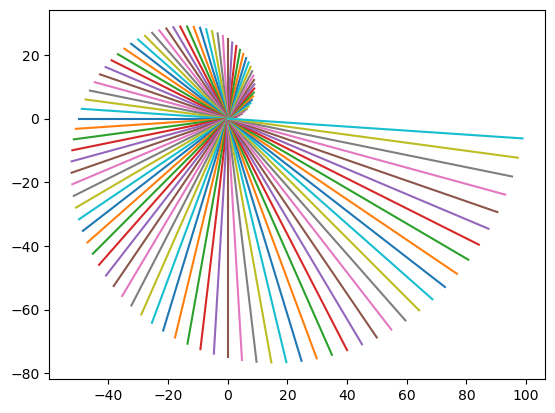

In [26]:
n = 100

for k in range(n):
    z = k*np.exp(k*2*np.pi*1j/n)
    plt.plot([0, np.real(z)], [0, np.imag(z)])

plt.pcolormesh()
plt.axis('square')
plt.show()

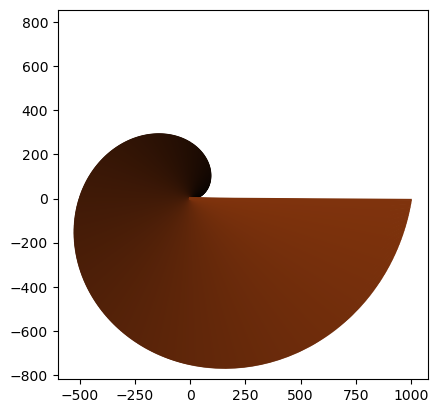

In [27]:
n = 1000

for k in range(n):
    z = k*np.exp(k*2*np.pi*1j/n)
    plt.plot([0, np.real(z)], [0, np.imag(z)], color=[1/2*k/n, 1/5*k/n, 1/20*k/n])

plt.axis('square')
plt.show()


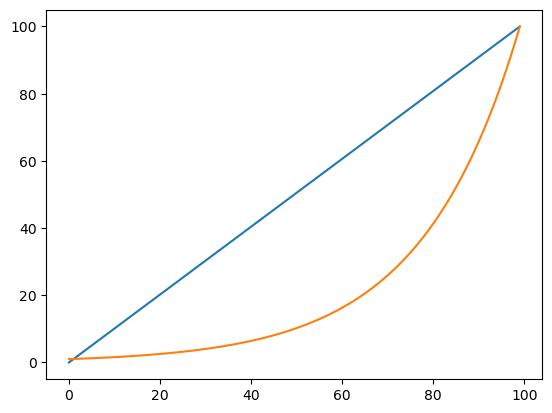

In [28]:
expr1 = np.linspace(0,100,100)
expr2 = np.logspace(0,2,100)

plt.plot(expr1)
plt.plot(expr2)
plt.show()

In [29]:


a = 3
b = 4

res = b*np.log(a)
res2 = np.log(a**b)

display(Math('\\log(a^b) = b\\log(a)'))

display(Math('\\log(%s^%s) = %s' % (a, b, res)))
display(res - res2)
display(res - res2)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

[ 0 10 20 30 40 50 60 70 80 90]
[  2   3   5   9  17  33  65 129 257 513]


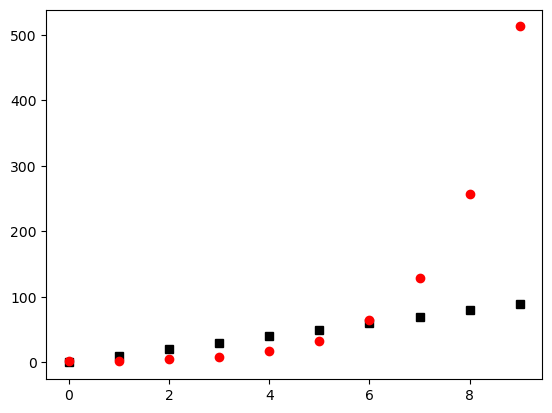

In [30]:
a = 0
d = 10

g = 1
r = 2

n = 10

aExpr = a + d*np.arange(0, n)
gExpr = g + r**(np.arange(0, n))

plt.plot(aExpr,'ks')
plt.plot(gExpr,'ro')

print(aExpr)
print(gExpr)

plt.show()


In [31]:
x = -0.042
orderOfMag = int(np.floor(np.log10(abs(x))))
Xstr = '{:,e}'.format(x)

display(Math('%s \\text{ is } %s \\text{ orders of magnitude, } \\approx %s \\times 10^%s' % (
    x, orderOfMag, Xstr[:Xstr.find('.')], n)))


<IPython.core.display.Math object>

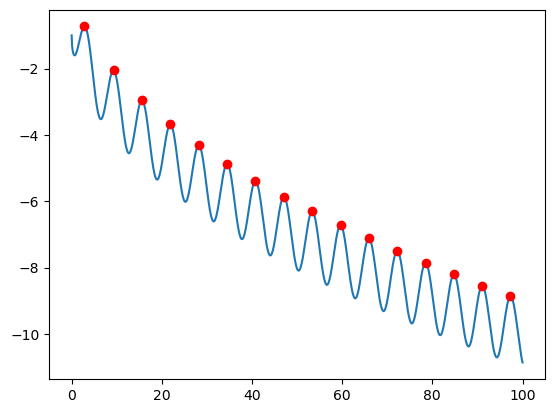

In [32]:
x = np.linspace(0, 100, 1000)

fx = -np.cos(x)-np.sqrt(x)

plt.plot(x, fx)
plt.plot(x[find_peaks(fx)[0]], fx[find_peaks(fx)[0]], 'ro')


In [1]:
x = np.linspace(0, 10, 100)

fx = np.sin(x)
fx1 = np.sin(-x)

plt.subplot(1, 2, 1)

plt.plot(fx)


plt.subplot(1, 2, 2)
plt.plot(-fx1)


NameError: name 'np' is not defined